In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [120]:
df = pd.read_csv('/content/E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [121]:
df.shape

(10999, 12)

In [122]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [124]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [125]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [126]:
df2 = list(df.columns)
df2

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [206]:
# CHECKING FOR OUTLIERS

for col in df:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df3 = df[(df[col]>=Q1-1.5*IQR) & (df[col]<=Q3+1.5*IQR)]

In [127]:
df.shape

(10999, 12)

In [128]:
df3.shape

(10999, 12)

In [129]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

In [130]:
# CHECKING FRO DUPLICATE SUMMATIONS

df.duplicated().sum()

0

In [131]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<Axes: >

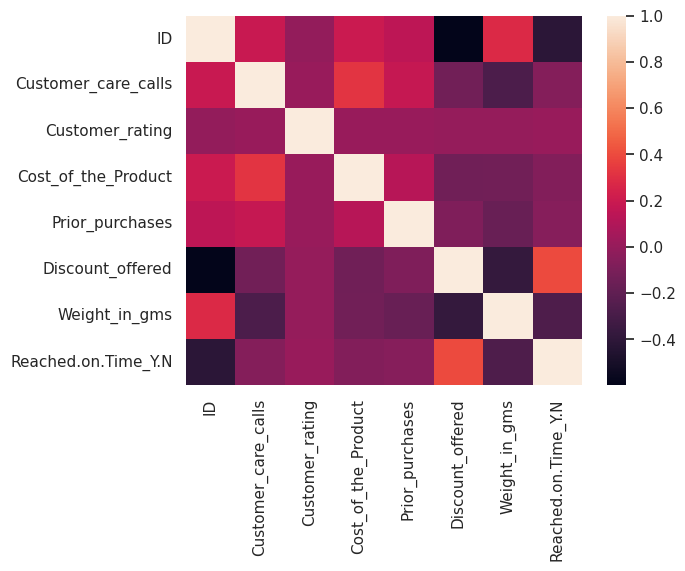

In [132]:
sns.heatmap(df.corr())

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# it is abserved that customer rating ranges from 1-5

df['Customer_rating'].unique()

array([2, 5, 3, 1, 4])

In [135]:
# checking the number of customer rating

df.groupby(['Customer_rating'])[['ID']].count()

,ID
Customer_rating,
1,2235
2,2165
3,2239
4,2189
5,2171


In [136]:
# checking the number of product delivered on time
# 0 indicate the count of customers that recieved their products on time reached.
# 1 indicate the count of customers that hasnt recieved their products on time reached.


df.groupby(['Reached.on.Time_Y.N'])[['ID']].count()

,ID
Reached.on.Time_Y.N,
0,4436
1,6563


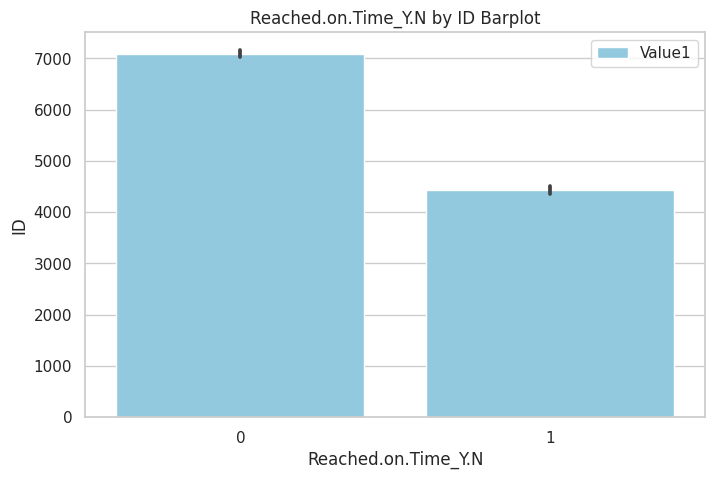

In [137]:
#BARCHART

df = pd.DataFrame(df)

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Reached.on.Time_Y.N', y='ID', data=df, label='Value1', color='skyblue')
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel('ID')
plt.title('Reached.on.Time_Y.N by ID Barplot')
plt.legend()
plt.show()

In [138]:
# checking for the unique numbers of customer care calls which are from 2 - 7

df['Customer_care_calls'].unique()

array([4, 2, 3, 5, 6, 7])

In [139]:
# CHEAKING FOR THE CUSTOMER CARE CALLS VERSUS PRODUCT IMPORTANCE

df.groupby(['Customer_care_calls'])[['Product_importance']].count()

,Product_importance
Customer_care_calls,
2,638
3,3217
4,3557
5,2328
6,1013
7,246


In [140]:
df.groupby(['Product_importance'])[['Customer_care_calls']].count()

,Customer_care_calls
Product_importance,
high,948
low,5297
medium,4754


In [141]:
#Checking if product qeury is being answered if the product importance is high, having highest customer ratings, or been delovered on time.

Product_importance = "high"
Customer_care_calls = 2  # Assuming the customer rating is on a scale from 2 to 7
'Reached.on.Time_Y.N' == True  # Assuming the product is delivered on time

if Product_importance == "high" or Customer_care_calls == 7 or 'Reached.on.Time_Y.N':
    print("Customer query is being answered.")
else:
    print("Customer query might not be adequately addressed.")


Customer query is being answered.


In [142]:
df.groupby(['Gender'])[['ID']].count()

,ID
Gender,
F,5545
M,5454


In [209]:
df.groupby(['Gender'])[['Customer_rating', 'Product_importance']].sum()

,Customer_rating,Product_importance
Gender,,
0,16332,7307
1,16561,7498


In [143]:
# transforming strings to integer using labelencoder


les = LabelEncoder()
df['Product_importance'] = les.fit_transform(df.Product_importance)

In [144]:
df.Product_importance.nunique()

3

In [145]:
les = LabelEncoder()
df['Warehouse_block'] = les.fit_transform(df.Warehouse_block)

In [146]:
df.Warehouse_block.nunique()

5

In [147]:
les = LabelEncoder()
df['Mode_of_Shipment'] = les.fit_transform(df.Mode_of_Shipment)

In [148]:
df.Mode_of_Shipment.nunique()

3

In [149]:
client_sex = {'M':0, 'F':1}
df['Gender'] = df.Gender.map(client_sex)

In [150]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,1,44,1233,1
1,2,4,0,4,5,216,2,1,0,59,3088,1
2,3,0,0,2,2,183,4,1,0,48,3374,1
3,4,1,0,3,3,176,4,2,0,10,1177,1
4,5,2,0,2,2,184,3,2,1,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,1,1,1538,1
10995,10996,1,2,4,1,232,5,2,1,6,1247,0
10996,10997,2,2,5,4,242,5,1,1,4,1155,0
10997,10998,4,2,5,2,223,6,2,0,2,1210,0


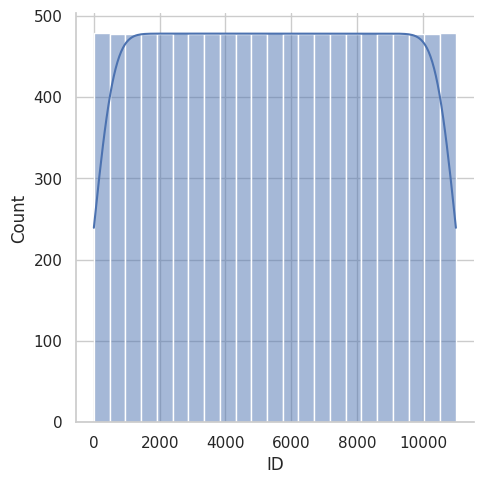

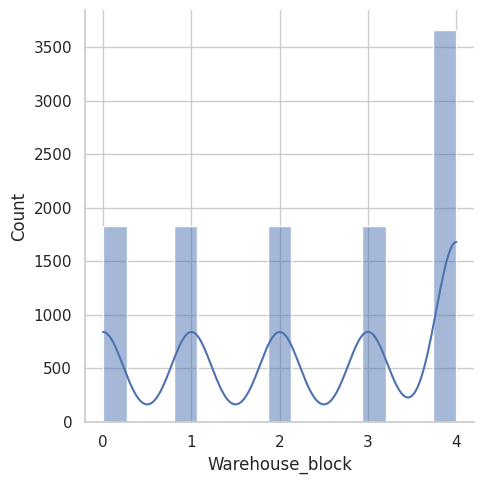

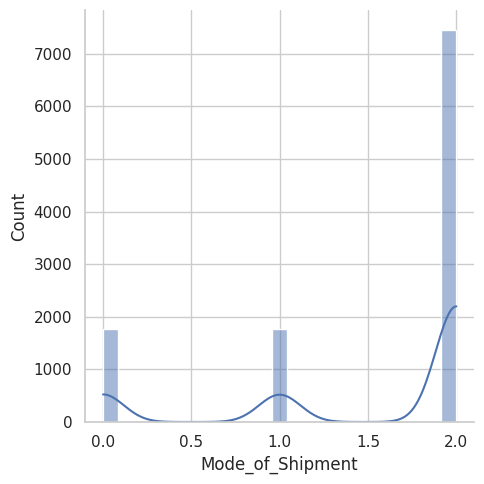

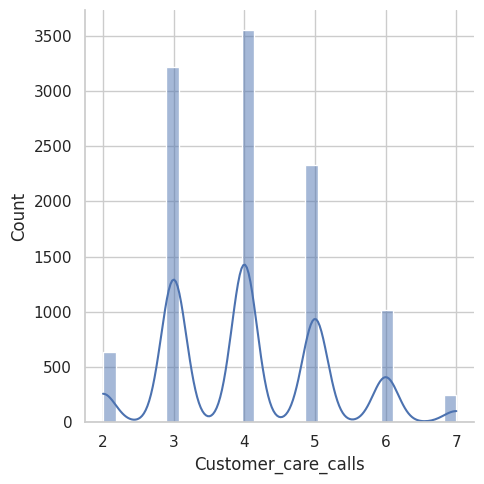

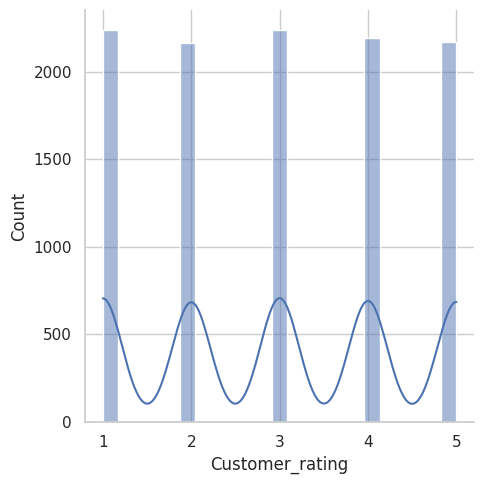

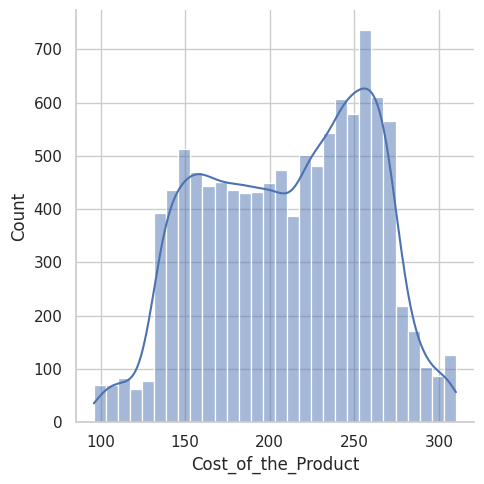

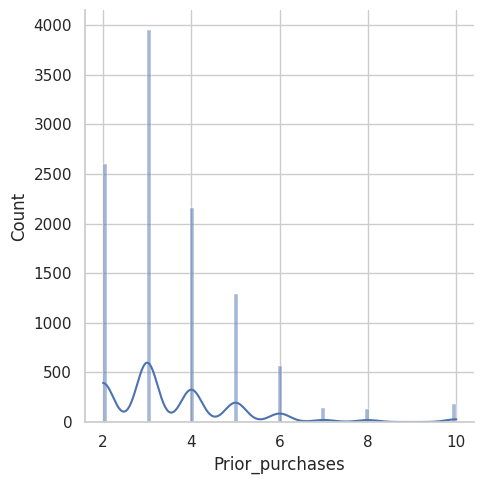

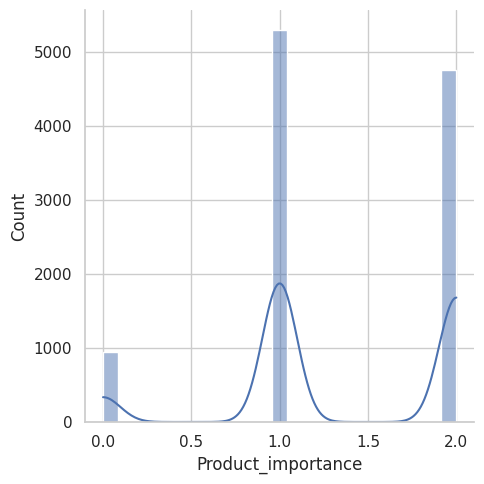

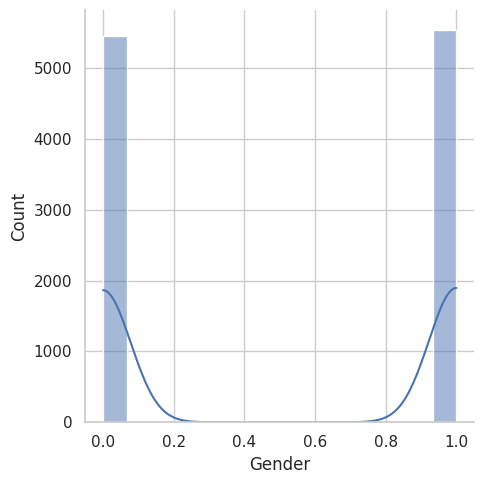

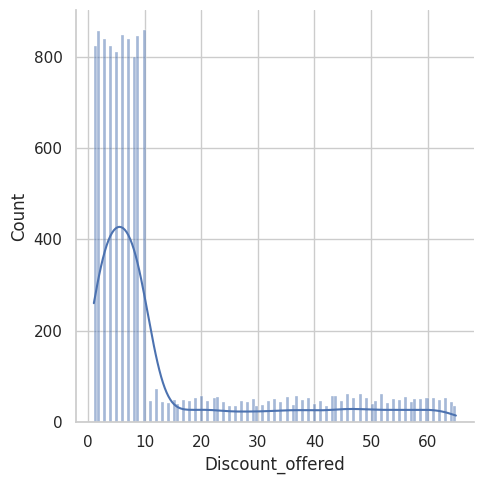

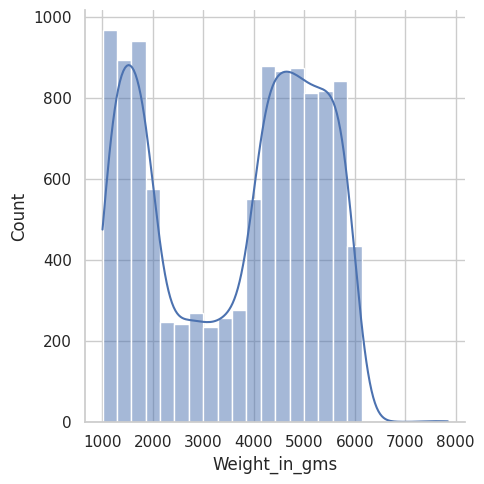

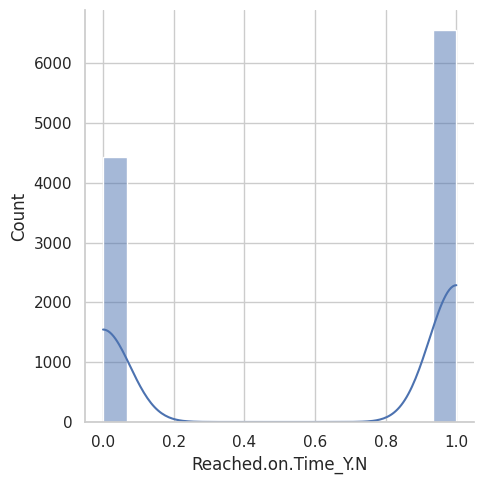

In [151]:
for i in df2:
  sns.displot(df[i], kde = True)

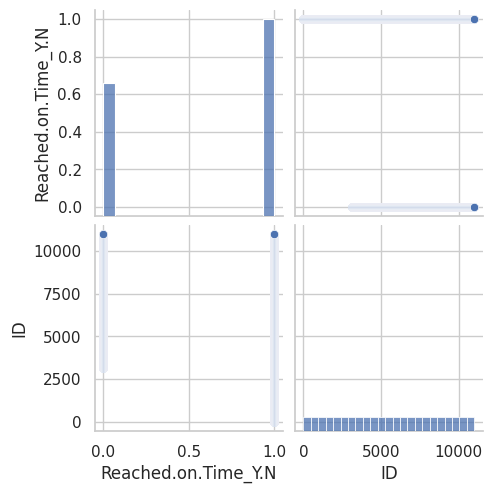

In [152]:
#PAIRPLOT

# Select the columns you want to include in the pairplot
columns1 = ['Reached.on.Time_Y.N', 'ID']

# Create a pairplot for the selected columns
sns.pairplot(df[columns1])
plt.show()

##splitting dataset into input and output data X & Y respectively

In [153]:
X = df.iloc[:,0:11]
X

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,0,4,2,177,3,1,1,44,1233
1,2,4,0,4,5,216,2,1,0,59,3088
2,3,0,0,2,2,183,4,1,0,48,3374
3,4,1,0,3,3,176,4,2,0,10,1177
4,5,2,0,2,2,184,3,2,1,46,2484
...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,1,1,1538
10995,10996,1,2,4,1,232,5,2,1,6,1247
10996,10997,2,2,5,4,242,5,1,1,4,1155
10997,10998,4,2,5,2,223,6,2,0,2,1210


In [154]:
X.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,0,4,2,177,3,1,1,44,1233
1,2,4,0,4,5,216,2,1,0,59,3088
2,3,0,0,2,2,183,4,1,0,48,3374
3,4,1,0,3,3,176,4,2,0,10,1177
4,5,2,0,2,2,184,3,2,1,46,2484


In [155]:
y = df[['Reached.on.Time_Y.N']]
y.head()

,Reached.on.Time_Y.N
0,1
1,1
2,1
3,1
4,1


##implementing the train_test_split

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [158]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8249, 11)
(2750, 11)
(8249, 1)
(2750, 1)


## feature scaling technique - standard scaler


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
sc = StandardScaler() #object of standard scaler

In [161]:
sc.fit(X_train)

StandardScaler()

In [162]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [163]:
X_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
1463,1464,4,2,4,3,170,2,2,1,33,1980
10751,10752,4,2,5,5,244,6,1,1,1,1222
3785,3786,4,2,5,5,184,3,1,1,5,5045
3397,3398,4,2,4,4,176,3,1,1,1,4774
5737,5738,4,1,5,1,248,2,1,1,6,5281
...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,2,1,3,5,275,2,1,1,7,4619
5191,5192,4,1,5,5,187,4,2,1,9,5326
5390,5391,0,2,4,2,137,2,2,1,2,5804
860,861,0,2,5,3,144,6,2,1,35,1009


In [164]:
pd.DataFrame(X_train_sc)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.273786,1.118797,0.638450,-0.056790,0.000515,-0.837515,-1.035484,1.034984,0.998667,1.209267,-1.004384
1,1.654277,1.118797,0.638450,0.817198,1.416446,0.694715,1.582262,-0.551632,0.998667,-0.761821,-1.467541
2,-0.541771,1.118797,0.638450,0.817198,1.416446,-0.547634,-0.381047,-0.551632,0.998667,-0.515435,0.868410
3,-0.664088,1.118797,0.638450,-0.056790,0.708481,-0.713280,-0.381047,-0.551632,0.998667,-0.761821,0.702822
4,0.073602,1.118797,-0.680171,0.817198,-1.415416,0.777539,-1.035484,-0.551632,0.998667,-0.453838,1.012613
...,...,...,...,...,...,...,...,...,...,...,...
8244,0.072656,-0.223597,-0.680171,-0.930778,1.416446,1.336596,-1.035484,-0.551632,0.998667,-0.392242,0.608113
8245,-0.098526,1.118797,-0.680171,0.817198,1.416446,-0.485516,0.273389,1.034984,0.998667,-0.269049,1.040109
8246,-0.035791,-1.565990,0.638450,-0.056790,-0.707451,-1.520807,-1.035484,1.034984,0.998667,-0.700224,1.332179
8247,-1.463884,-1.565990,0.638450,0.817198,0.000515,-1.375866,1.582262,1.034984,0.998667,1.332460,-1.597690


In [165]:
X_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,108,4,2,4,5,216,3,0,0,26,2053
5594,5595,0,1,3,1,220,3,1,1,6,5572
6997,6998,4,0,3,2,215,4,1,1,3,4042
3984,3985,3,0,5,1,160,5,1,1,1,4672
3111,3112,1,2,5,4,229,2,2,1,44,2419
...,...,...,...,...,...,...,...,...,...,...,...
3944,3945,0,2,3,5,159,2,2,0,6,5804
10782,10783,3,2,2,1,240,2,1,0,8,1144
9604,9605,2,0,4,2,134,3,2,1,1,4064
2513,2514,4,2,3,2,270,2,2,1,59,3706


In [166]:
pd.DataFrame(X_test_sc)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.701269,1.118797,0.638450,-0.056790,1.416446,0.114953,-0.381047,-2.138248,-1.001334,0.778092,-0.959779
1,0.028521,-1.565990,-0.680171,-0.930778,-1.415416,0.197776,-0.381047,-0.551632,0.998667,-0.453838,1.190421
2,0.470820,1.118797,-1.998791,-0.930778,-0.707451,0.094247,0.273389,-0.551632,0.998667,-0.638628,0.255552
3,-0.479035,0.447600,-1.998791,0.817198,-1.415416,-1.044573,0.927826,-0.551632,0.998667,-0.761821,0.640498
4,-0.754251,-0.894793,0.638450,0.817198,0.708481,0.384128,-1.035484,1.034984,0.998667,1.886829,-0.736143
...,...,...,...,...,...,...,...,...,...,...,...
2745,-0.491645,-1.565990,0.638450,-0.930778,1.416446,-1.065279,-1.035484,1.034984,-1.001334,-0.453838,1.332179
2746,1.664050,0.447600,0.638450,-1.804765,-1.415416,0.611892,-1.035484,-0.551632,-1.001334,-0.330645,-1.515201
2747,1.292683,-0.223597,-1.998791,-0.056790,-0.707451,-1.582924,-0.381047,1.034984,0.998667,-0.761821,0.268994
2748,-0.942771,1.118797,0.638450,-0.930778,-0.707451,1.233067,-1.035484,1.034984,0.998667,2.810776,0.050247


In [167]:
df['Customer_rating'].mean()

2.9905445949631786

In [168]:
df['Customer_rating'].std()

1.4136031713232975

##Machine Learning with KNeighborsClassifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
model1 = KNeighborsClassifier(n_neighbors=5)

In [171]:
model1.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [172]:
y_pred = model1.predict(X_test_sc)
y_pred #predicted output

array([1, 0, 1, ..., 0, 1, 0])

In [173]:
#actual output

y_test

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [174]:
# to check the accuracy score


print(accuracy_score(y_test,y_pred))

0.649090909090909


## Machine Learning with AdaBoostClassifier


In [175]:
from sklearn.ensemble import AdaBoostClassifier

In [176]:
model2 = AdaBoostClassifier()
model2.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [177]:
y_pred2 = model2.predict(X_test_sc)
y_pred2

array([1, 0, 0, ..., 0, 1, 0])

In [178]:
y_test

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [179]:
# to check the accuracy score

print(accuracy_score(y_test,y_pred2))

0.6730909090909091


In [180]:
#now we will pass some customized parameter

from sklearn.linear_model import LogisticRegression

In [181]:
model3 = AdaBoostClassifier(estimator = LogisticRegression(), n_estimators = 100)

In [182]:
model3.fit(X_train_sc,y_train)

AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=100)

In [183]:
y_pred3 = model3.predict(X_test_sc)
y_pred3

array([1, 0, 0, ..., 0, 1, 0])

In [184]:
# to check the accuracy score

print(accuracy_score(y_test,y_pred3))

0.6487272727272727


##ML with Support Vector Classifier (SVC)


In [185]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8249, 11)
(2750, 11)
(8249, 1)
(2750, 1)


In [186]:
from sklearn.svm import SVC

In [187]:
model4 = SVC()

In [188]:
model4.fit(X_train_sc, y_train)

SVC()

In [189]:
y_pred4 = model4.predict(X_test_sc)
y_pred4

array([1, 0, 0, ..., 0, 1, 0])

In [190]:
y_test

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [191]:
# to check the accuracy score

print(accuracy_score(y_test,y_pred4))

0.68


## ML with Random Forest Classifier


In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
model5 = RandomForestClassifier(n_estimators = 150) # means it will implement total 150 decision tree behind the seen

In [194]:
model5.fit(X_train_sc,y_train)

RandomForestClassifier(n_estimators=150)

In [195]:
y_pred5 = model5.predict(X_test_sc)
y_pred5

array([1, 0, 1, ..., 0, 1, 0])

In [196]:
y_test

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [197]:
# to check the accuracy score

print(accuracy_score(y_test,y_pred5))

0.6712727272727272


## ML with Decision Tree Classifier

In [198]:
from sklearn.tree import DecisionTreeClassifier

In [199]:
model6 = DecisionTreeClassifier()

In [200]:
model6.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [201]:
y_pred6 = model6.predict(X_test_sc)
y_pred6

array([1, 0, 1, ..., 0, 1, 0])

In [202]:
y_test

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [203]:
# to check the accuracy score

print(accuracy_score(y_test,y_pred6))

0.6494545454545455


Plotting DessionTree

In [204]:
from sklearn import tree

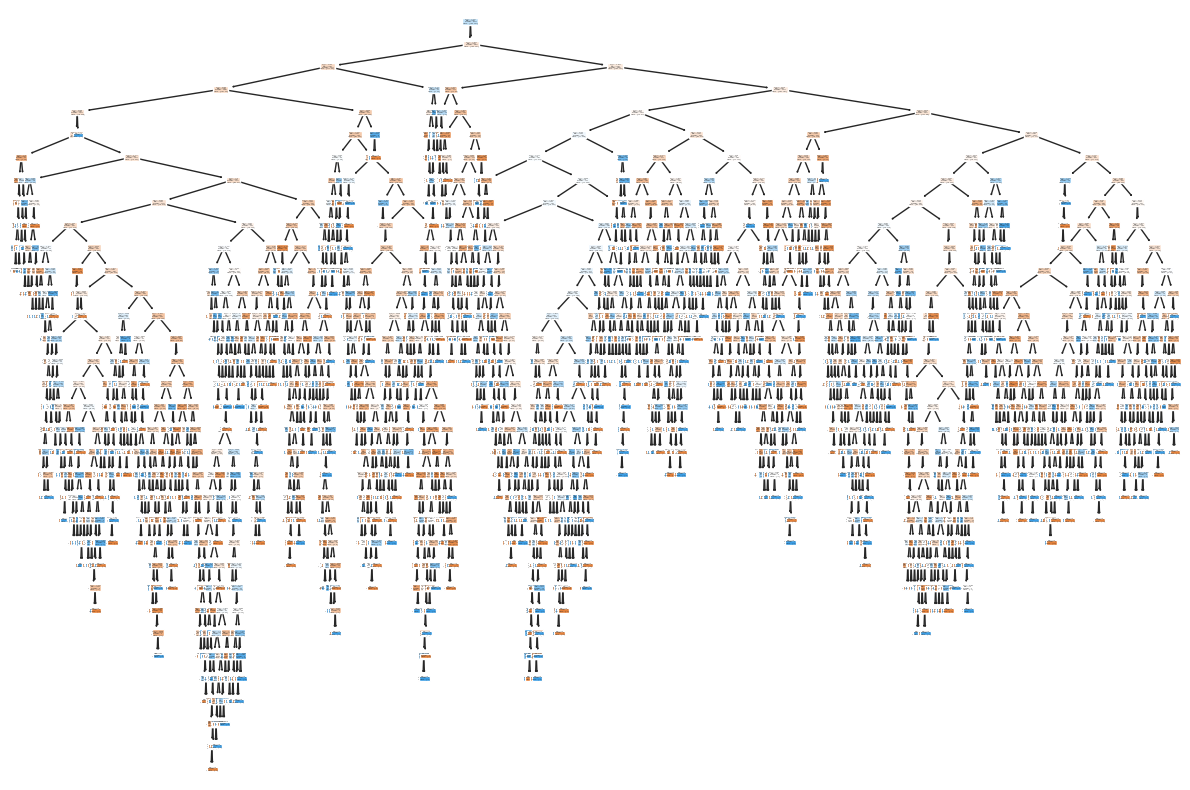

In [205]:
plt.figure(figsize = (15,10))
tree.plot_tree(model6, filled = True)
plt.show()